In [2]:
# importações das bibliotecas padrões, dataset para treinamento, metricas e o modelo a ser utilizado
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

In [7]:
#preparação dos dados
#carrega os dados do dataset
digits = datasets.load_digits()
# transforma as imagens de matrizes 8x8 para um array de 64 valores 
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# cria o classificador que será utilizado (support vector machines)
clf = svm.SVC(gamma=0.001)

# divide os dados ao meio para treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

#treinamento e teste do modelo
# executa o treinamento do modelo
clf.fit(X_train, y_train)

# faz a predição dos digitos com os dados de treinamento
predicted = clf.predict(X_test)

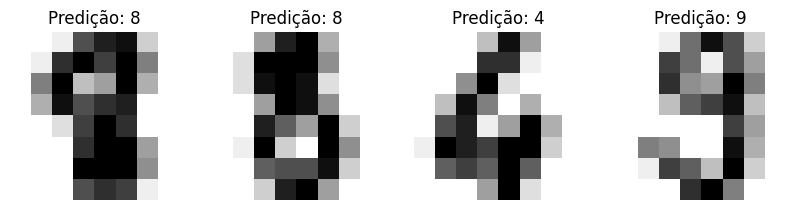

In [8]:
#vizualição das predições do modelo
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Predição: {prediction}")

Matriz de confusão:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


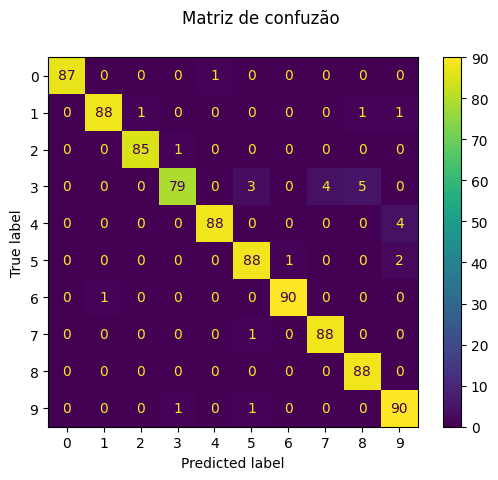

In [9]:
#printa a matriz de confusão
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Matriz de confuzão")
print(f"Matriz de confusão:\n{disp.confusion_matrix}")

plt.show()

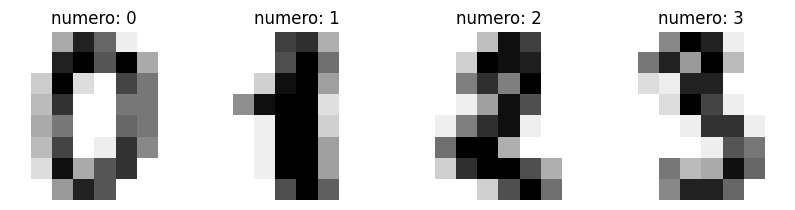

In [11]:
#vizualização das imagens de treinamento
#exibe alguns exemplares de imagens do dataset
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("numero: %i" % label)